In [2]:
%matplotlib inline
import numpy as np
from tabulate import tabulate
from scipy import stats, special, signal
from matplotlib import pyplot as plt

# Problem 0: some fake data to mess with

In [41]:
#time axis that goes from 0 to 100π in 1e5 steps
t = np.linspace(0,np.pi*100,np.int(1e5))
#offset sinusoid
N = 10+np.sin(t)
#random background data whose mean and variance depend on N
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

ffr... indexing: [start:end] ; [start:end:step] ; w/o input, start default=0, end default=end of array, step default=1

if [-1:-3:step=-1], goes from one from last to third from last, backwards

Ellipsis expands to the number of : objects needed for the selection tuple to index all dimensions. In most cases, this means that length of the expanded selection tuple is x.ndim

a[:] copies the whole array

a[-1]  - last item in the array
a[-2:] - last two items in the array
a[:-2] - everything except the last two items

# Problem 1: subsets of data

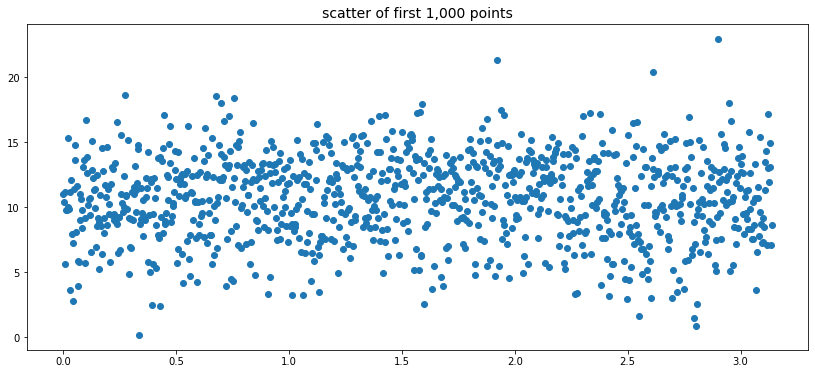

In [35]:
# 1a) scatter of first 1000 data pts

fig, ax = plt.subplots(1,1)
fig.set_size_inches(14,6) 

ax.scatter(t[:1000],bkgd[:1000])

ax.set_title('scatter of first 1,000 points',fontsize=14);

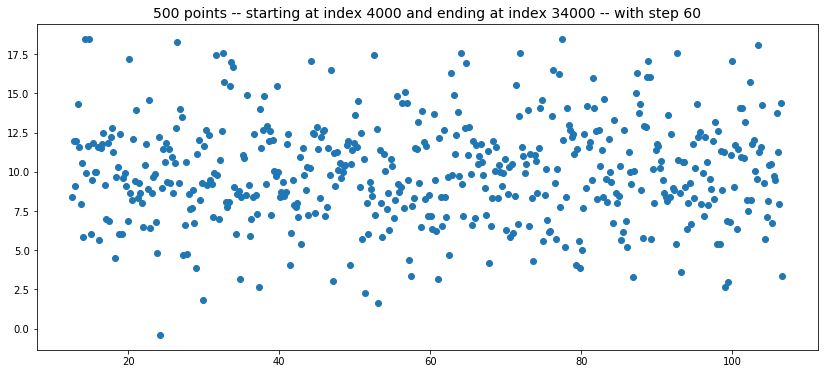

In [38]:
# 1b) create function that plots data with arbitrary end point when given number of pts, start, step

def plotpts(x,y,start,pts,step):
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(14,6) 
    
    end = pts*step + start
    if end > len(x):
        print("\nEndpoint exceeds array limit!\n")
    
    ax.scatter(x[start:end:step],y[start:end:step])
    
    ax.set_title('{0:g} points -- starting at index {1:g} and ending at index {2:g} -- with step {3:g}'.format(pts,start,end,step),fontsize=14)
    
plotpts(x=t,y=bkgd,start=4000,pts=500,step=60)

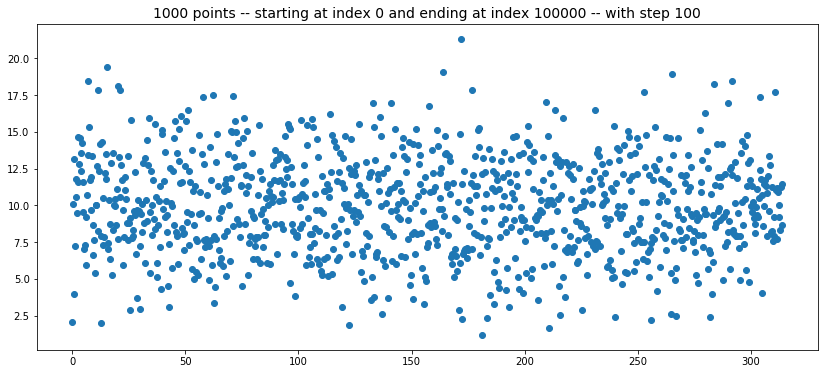

In [84]:
# 1c) create function that plots arbitrary number of pts when given start, end, step

def plotslice(x,y,start,end,step):
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(14,6) 
    
    pts = (end-start)/step
    
    ax.scatter(x[start:end:step],y[start:end:step])
    #ax.set_yscale('log')
    
    ax.set_title('{0:g} points -- starting at index {1:g} and ending at index {2:g} -- with step {3:g}'.format(pts,start,end,step),fontsize=14)

plotslice(x=t,y=bkgd,start=0,end=len(t),step=100)

# Problem 2: density

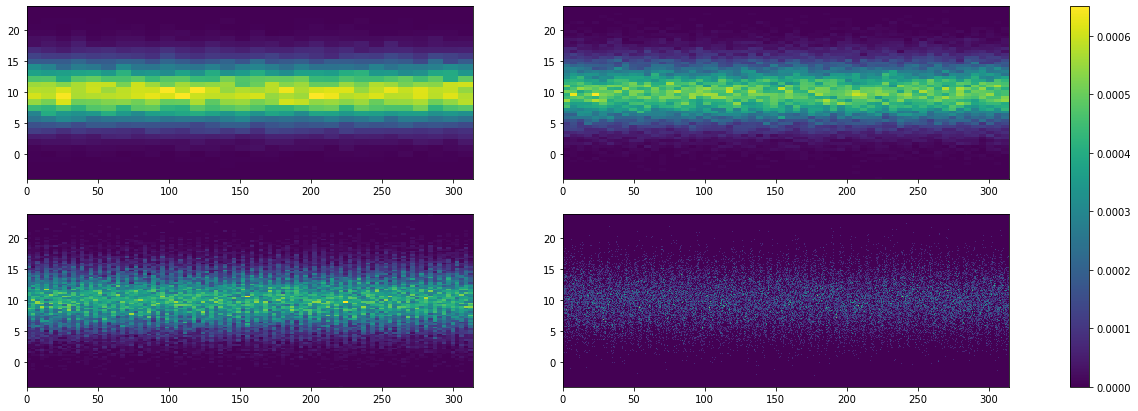

In [75]:
# 2a) making a 2d hist...

fig, ax = plt.subplots(2,2)
fig.set_size_inches(22,7) 

h1 = ax[0,0].hist2d(t,bkgd,bins=30,density=True)
h2 = ax[0,1].hist2d(t,bkgd,bins=60,density=True)
h3 = ax[1,0].hist2d(t,bkgd,bins=100,density=True)
h4 = ax[1,1].hist2d(t,bkgd,bins=500,density=True)

plt.colorbar(h3[3], ax=ax);

#### 2b) The darker the color, the less likely we will find data in that region, ie, we are not likely to find that our background at any time will have a value less than 5 or greater than 15. This is an effective way to visualize patterns in data without being crowded by points. 

#### With density=True, the colorbar will reflect the proportional frequency, ie, the number of times the given point will be found divided by number of samples. If density=False, it will give an integer representing the number of times we might find that data point.

#### The number of bins represents the discretization of the intervals, where a bin is an interval for a data point to fall into. With a low bin number, we have less spatial resolution but retain count number. With high bin number, we are too resolved, and it becomes increasingly unlikely for two data points to fall into the same bin interval, thus allowing the sample noise to dominate. cmin/cmax can be specified so that a bin with less or more than a certain amt won't be displayed.

# Problem 3: folding

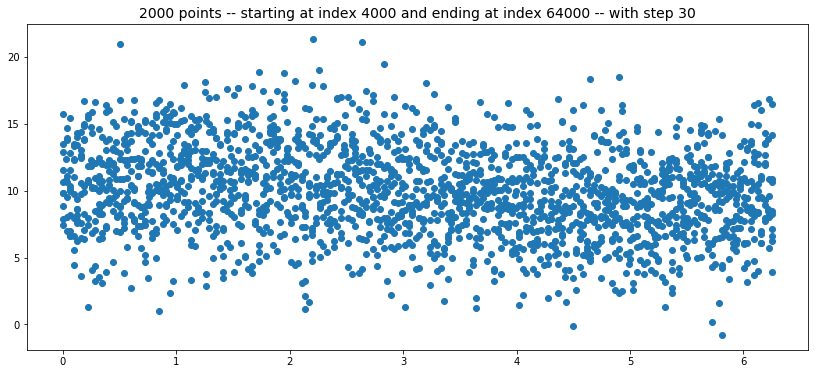

In [82]:
fold = t%(2*np.pi)
plotpts(x=fold,y=bkgd,start=4000,pts=2000,step=30)

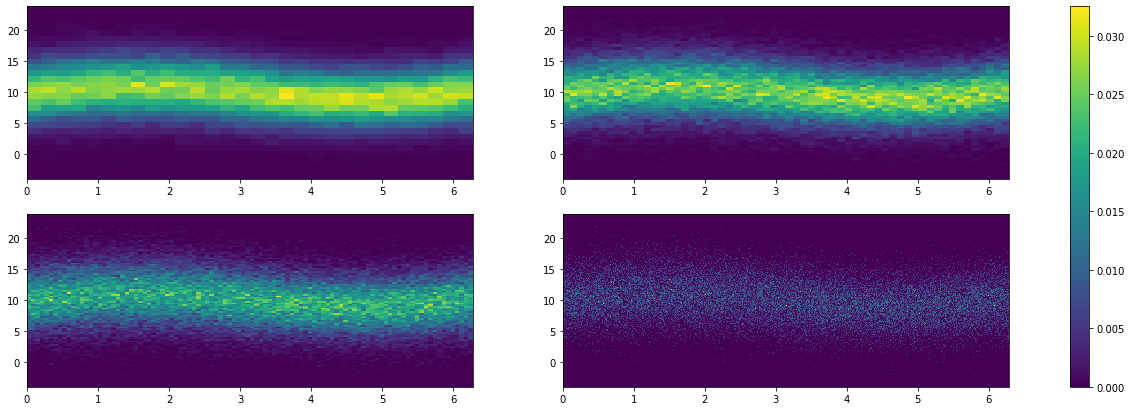

In [78]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(22,7) 

h1 = ax[0,0].hist2d(fold,bkgd,bins=30,density=True)
h2 = ax[0,1].hist2d(fold,bkgd,bins=60,density=True)
h3 = ax[1,0].hist2d(fold,bkgd,bins=100,density=True)
h4 = ax[1,1].hist2d(fold,bkgd,bins=500,density=True)

plt.colorbar(h3[3], ax=ax);

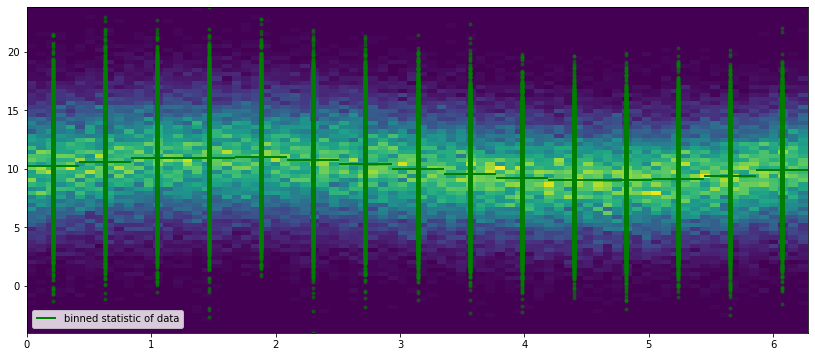

In [100]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(14,6) 

bin_means, bin_edges, binnumber = stats.binned_statistic(fold, bkgd, statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

h1 = ax.hist2d(fold,bkgd,bins=80,density=True)

plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=2, label='binned statistic of data')
plt.plot((binnumber - 0.5) * bin_width, bkgd, 'g.', alpha=0.5)

plt.legend(fontsize=10)
plt.show()